<a href="https://colab.research.google.com/github/monjjjjj/stockprice_prediction/blob/main/StockPrice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_set = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2014_2018.csv')
#training_set.head()

training_set["Date"] = pd.to_datetime(training_set["Date"])
training_set["year"] = training_set["Date"].dt.year
training_set["month"] = training_set["Date"].dt.month
training_set["date"] = training_set["Date"].dt.day
training_set["day"] = training_set["Date"].dt.dayofweek
#training_set.head()

training_set =  training_set.drop(["Date"], axis=1)
#training_set.head()

training_set = training_set.iloc[::-1]
#training_set.head()

In [35]:
#training_set = training_set.iloc[:, 1:2].values
#print(training_set)
#print(len(training_set))

In [4]:
training_set = training_set.iloc[:, 1:2].values

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))
print(X_train.shape[1])

1


In [5]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'sigmoid', input_shape = (None, 1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 4, epochs = 100)

print(model.summary())

Epoch 1/100
315/315 [==============================] - 4s 4ms/step - loss: 0.1420
Epoch 2/100
315/315 [==============================] - 1s 4ms/step - loss: 0.0331
Epoch 3/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0167
Epoch 4/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0060
Epoch 5/100
315/315 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 6/100
315/315 [==============================] - 1s 4ms/step - loss: 5.0127e-04
Epoch 7/100
315/315 [==============================] - 2s 7ms/step - loss: 3.7213e-04
Epoch 8/100
315/315 [==============================] - 2s 7ms/step - loss: 3.6511e-04
Epoch 9/100
315/315 [==============================] - 1s 4ms/step - loss: 3.7129e-04
Epoch 10/100
315/315 [==============================] - 1s 4ms/step - loss: 3.7747e-04
Epoch 11/100
315/315 [==============================] - 1s 4ms/step - loss: 3.7042e-04
Epoch 12/100
315/315 [==============================] - 1s 4ms/step - lo

In [6]:
test_set = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2019_test.csv')
test_set = test_set.iloc[::-1]
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (7, 1, 1))
predicted_stock_price = model.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 155ms/step


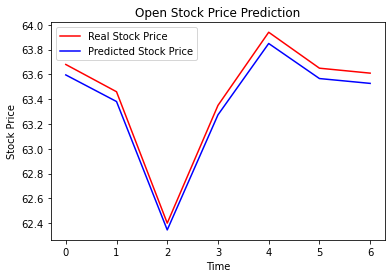

In [7]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Open Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

40/40 [==============================] - 0s 2ms/step


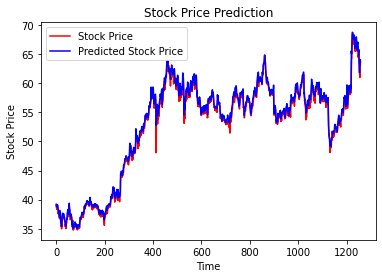

In [8]:
# Making predictions for the entire dataset
# Getting the real stock price of 2017 - 2021
real_stock_price_train = pd.read_csv('/content/drive/MyDrive/StockPrice_prediction/Starbucks_Stock_2014_2018.csv')
real_stock_price_train = real_stock_price_train.iloc[::-1]
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2017 - 2021
predicted_stock_price_train = model.predict(X_train)
predicted_stock_price_train = scaler.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))